<center><img src="Yulu-Logo.jpg"/></center>

# Business Case: Yulu - Hypothesis Testing

## Introduction

### About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

### Dataset Column Profiling

- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
    1: Clear, Few clouds, partly cloudy, partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered


# Exploratory Data Analysis

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind,f_oneway, levene, kruskal, shapiro, chi2_contingency
from statsmodels.graphics.gofplots import qqplot

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bike_sharing.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# No of rows and columns

df.shape

(10886, 12)

In [5]:
# Checking of null values

df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
# Duplicate values check

df.duplicated().sum()

0

In [7]:
# skewness of each column

df.skew(numeric_only = True)

season       -0.007076
holiday       5.660517
workingday   -0.776163
weather       1.243484
temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
dtype: float64

### Skewness Analysis of Variables

**Symmetrical Distribution**:
- The majority of the variables, including 'season' and 'temp', exhibit skewness values close to zero, indicating relatively symmetrical distributions.

**Positive Skewness**:
- Variables such as 'holiday', 'weather', 'windspeed', 'casual', 'registered', and 'count' demonstrate positive skewness, which means they have a concentration of lower values and their distributions are skewed to the right.

**Negative Skewness**:
- Conversely, 'workingday', 'atemp', and 'humidity' show negative skewness, suggesting a concentration of higher values and a leftward skew in their distributions.

In [8]:
# Uniques values of each columns

df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
# converting the categorical columns into category

cat_col = ['season', 'holiday', 'workingday', 'weather']

for x in cat_col:
 df[x] = df[x].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 723.7+ KB


In [11]:
# Converting datetime column into date time format

df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'].dtype

dtype('<M8[ns]')

In [12]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

In [13]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [14]:
# replacing the number with category

# change of season
df['season'] = df['season'].replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

# change of holiday
df['holiday'] = df['holiday'].replace({0:'No',1:'Yes'})

# change of workingday
df['workingday'] = df['workingday'].replace({0:'No',1:'Yes'})

# change of month
df['month'] = df['month'].replace({1: 'January',
                                   2: 'February',
                                   3: 'March',
                                   4: 'April',
                                   5: 'May',
                                   6: 'June',
                                   7: 'July',
                                   8: 'August',
                                   9: 'September',
                                   10: 'October',
                                   11: 'November',
                                   12: 'December'})

In [15]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count,year,day,hour
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,9.992559,11.541613
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,5.000000,6.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,10.000000,12.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,15.000000,18.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,19.000000,23.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,5.476608,6.915838


In [16]:
df.describe(include = 'category')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,Winter,No,Yes,1
freq,2734,10575,7412,7192


### Overview and Feature Patterns

**Temporal and Numerical Composition**:
- The dataset includes both datetime information and various numerical features related to bike rentals, covering observations from January 1, 2011, to December 19, 2012.

**Diverse Numerical Feature Characteristics**:
- Numerical features such as temperature, humidity, windspeed, and the counts of casual and registered bike rentals exhibit diverse ranges and distributions, reflecting the variability in rental patterns under different conditions.

**Temporal Patterns and Concentrations**:
- Analysis of the year, day, and hour variables reveals temporal patterns, with data concentrated in 2011 and 2012, an average day value around 10, and hourly distributions ranging from 0 to 23.

# Outlier Detection

In [17]:
plt.figure(figsize=(15, 12))
sns.set(style="darkgrid")

for i, column in enumerate(cat_col,1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=column, y='count', data=df, color="#5c1919")
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

### Outlier Analysis

**Outliers in Different Seasons**:
- Spring and winter exhibit more unusual values in the data compared to other seasons.

**Weather Outliers**:
- Weather category 3 contains many outliers, whereas category 4 has none.

**Working Days vs. Holidays**:
- Regular working days show more outliers compared to holidays, indicating some unexpected patterns during typical workdays that may warrant further investigation.

# Univariate Analysis

In [ ]:
time_span = df['datetime'].max() - df['datetime'].min()
time_span

Timedelta('718 days 23:00:00')

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [ ]:
color_map = ['#5c1919','#8a3421','#b65522','#de7b1b','#ffa600'] 

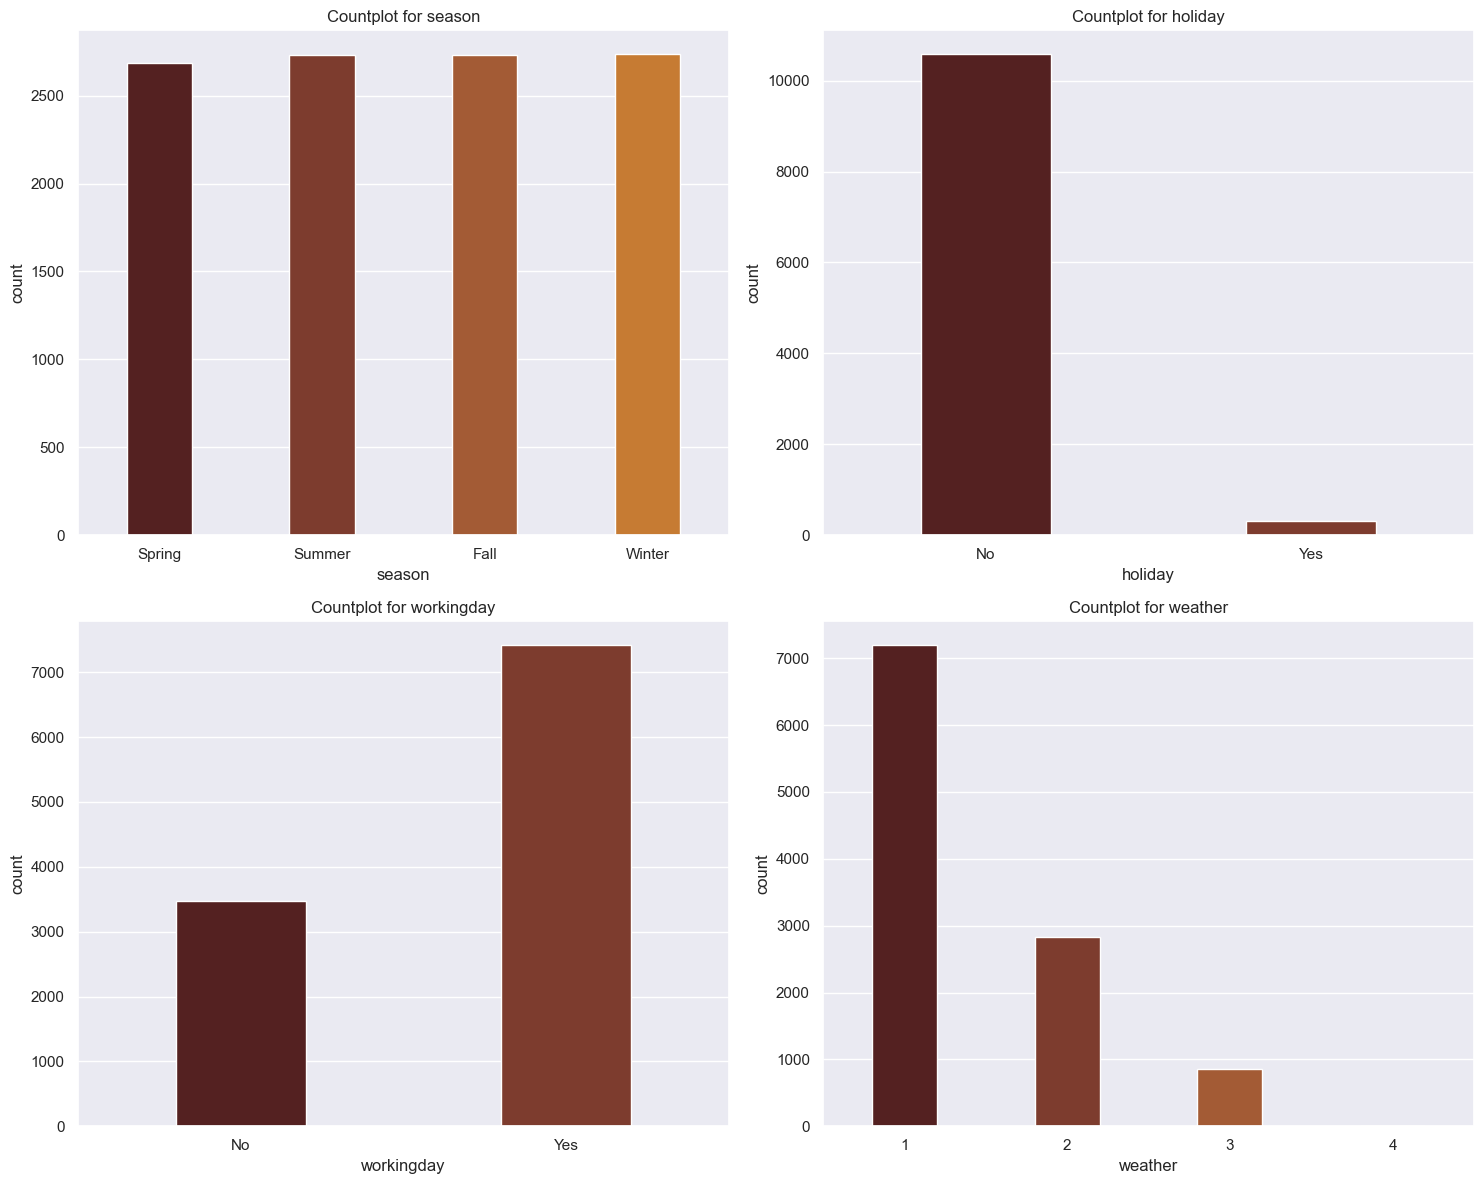

In [ ]:
# countplot on categories

plt.figure(figsize=(15, 12))
sns.set(style="darkgrid")

for i, column in enumerate(cat_col, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=column, data=df, palette=color_map, width=0.4)
    plt.title(f'Countplot for {column}')
    
plt.tight_layout()
plt.show()

In [ ]:
# Function for histogram & boxplot on numerical columns

def hist_box(column):
    f, axs = plt.subplots(1, 2, figsize=(10, 5))
    sns.set(style="darkgrid")
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=20, kde=True,color=color_map[0])
    plt.title(f'Histogram for {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[column], color=color_map[0])
    plt.title(f'Boxplot for {column}')

    plt.tight_layout()
    plt.show()

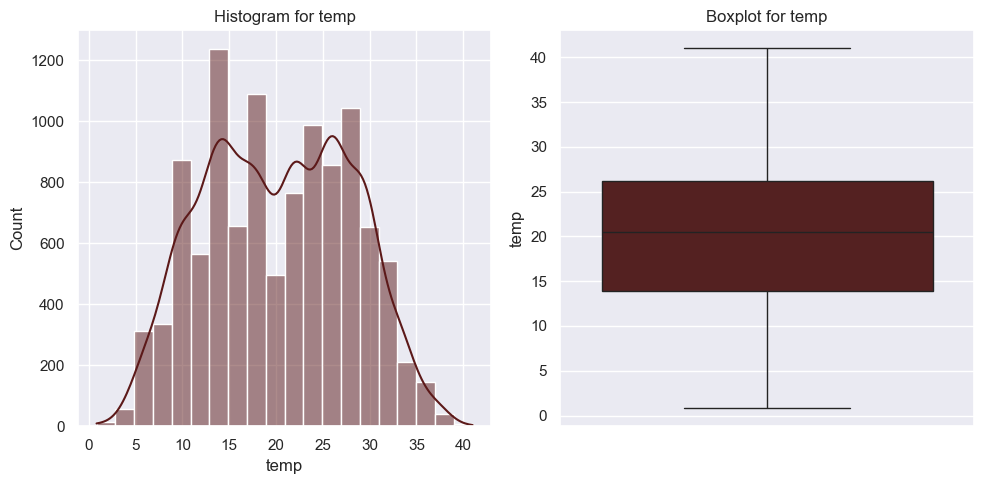

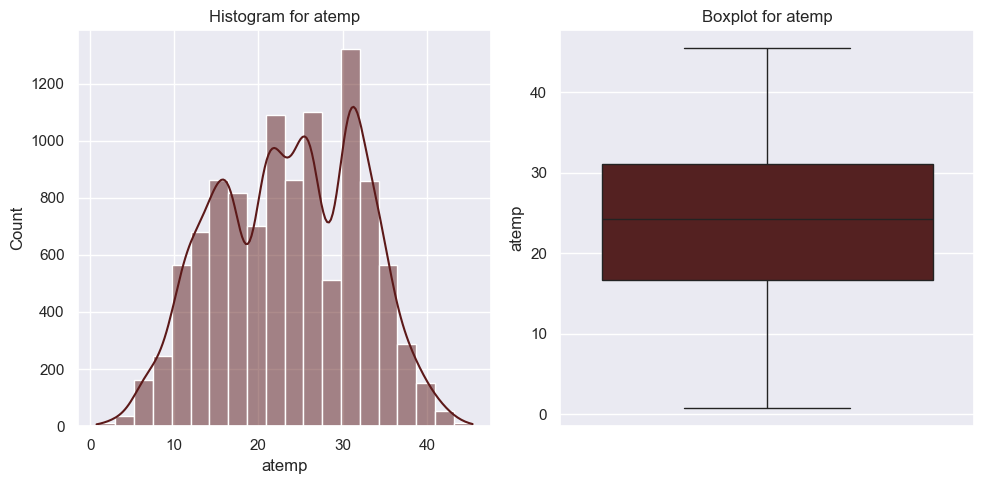

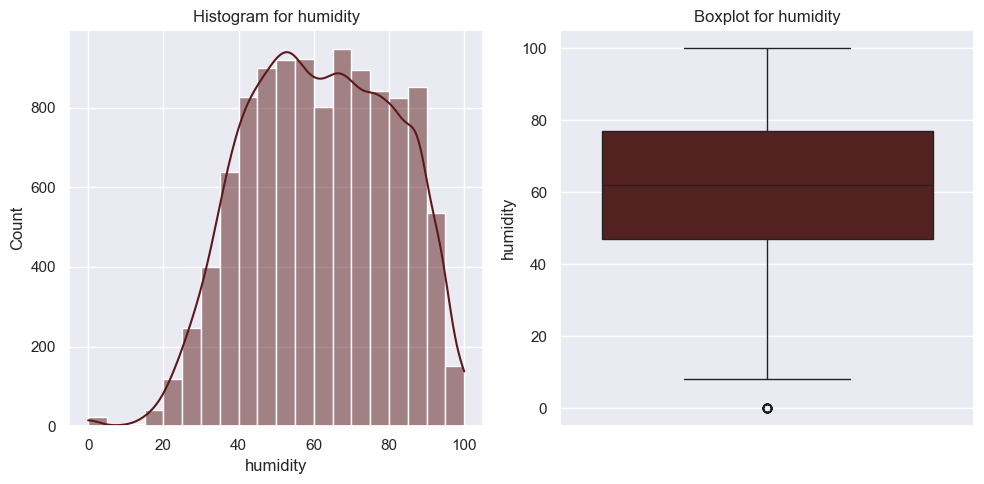

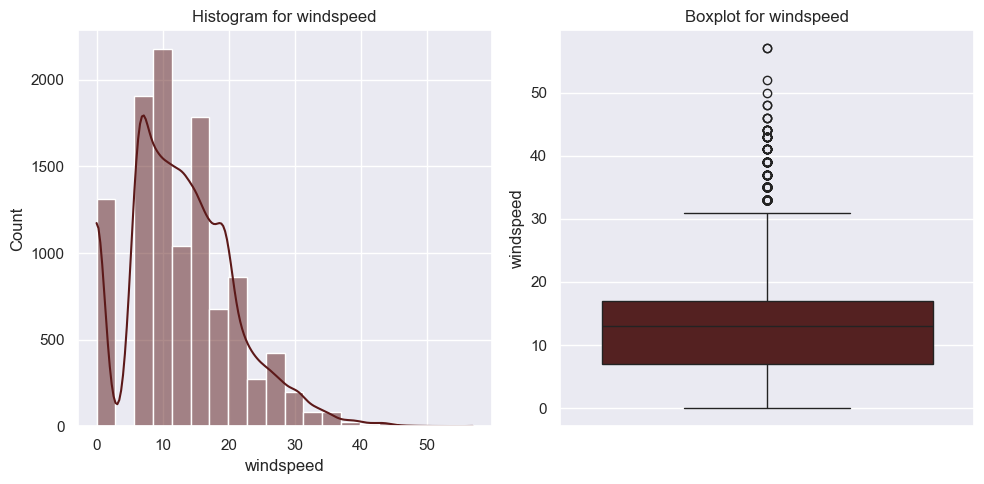

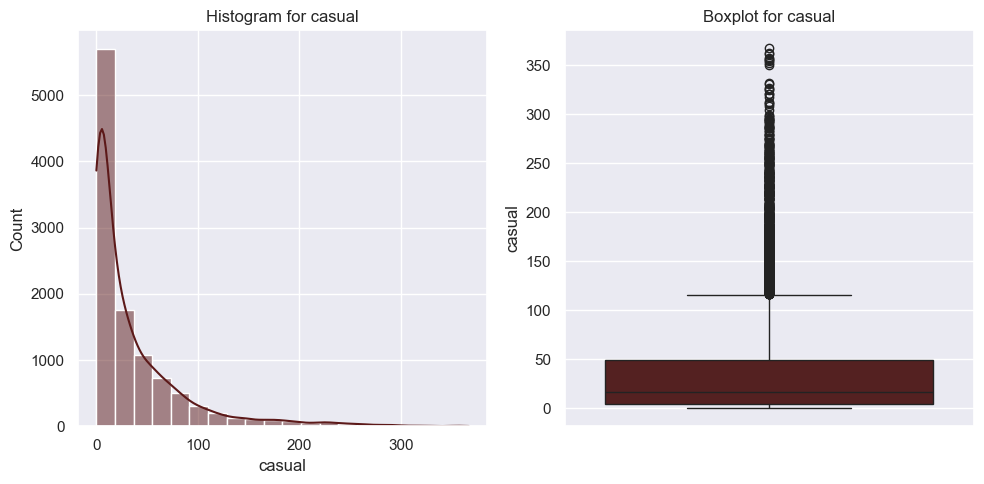

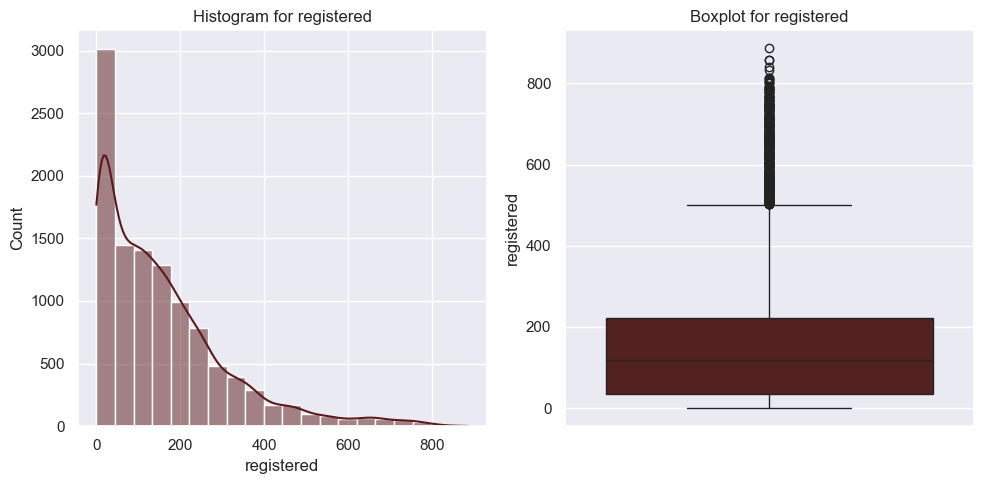

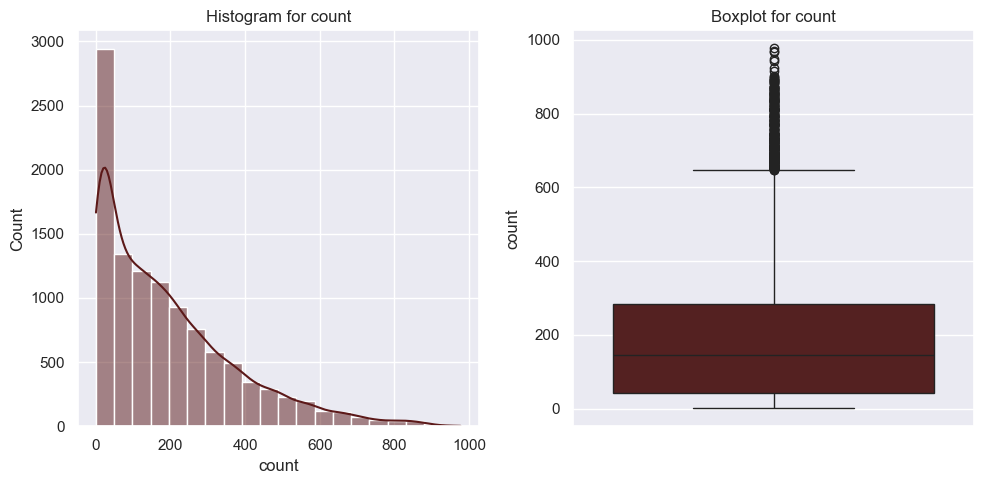

In [ ]:
num_col = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

for column in num_col:
    hist_box(column)

### Numerical Column Analysis

**Temp**:
- The 'temp' column exhibits a diverse temperature range from 0.82 to 41.0 degrees Celsius, with a median of 20.5 and moderate variability around the mean of approximately 20.23 degrees Celsius.

**Atemp**:
- The 'atemp' column shows a wide range of apparent temperatures from 0.76 to 45.455 degrees Celsius, with a mean of approximately 23.66 and moderate variability around the median of 24.24 degrees Celsius.

**Humidity**:
- The 'humidity' column ranges from 0 to 100, with an average of about 61.89. The distribution exhibits moderate variability, with values from 47 at the 25th percentile to 77 at the 75th percentile, indicating varied humidity levels in the dataset.

**WindSpeed**:
- The 'windspeed' column shows wind speeds ranging from 0 to 56.9979, with a mean of approximately 12.80.

**Casual**:
- The 'casual' column reflects a wide range of casual bike rental counts, from 0 to 367. The distribution is positively skewed, as evidenced by the mean (36.02) being less than the median (17.0).

**Registered**:
- The 'registered' column displays a diverse range of registered bike rental counts, from 0 to 886. The distribution is positively skewed, with the mean (155.55) being less than the median (118.0).

**Count**:
- The 'count' column indicates a wide range of total bike rental counts, from 1 to 977. The distribution is positively skewed, with the mean (191.57) being greater than the median (145.0), suggesting a concentration of lower values.

# Bivariate Analysis

In [ ]:
cat_col

['season', 'holiday', 'workingday', 'weather']

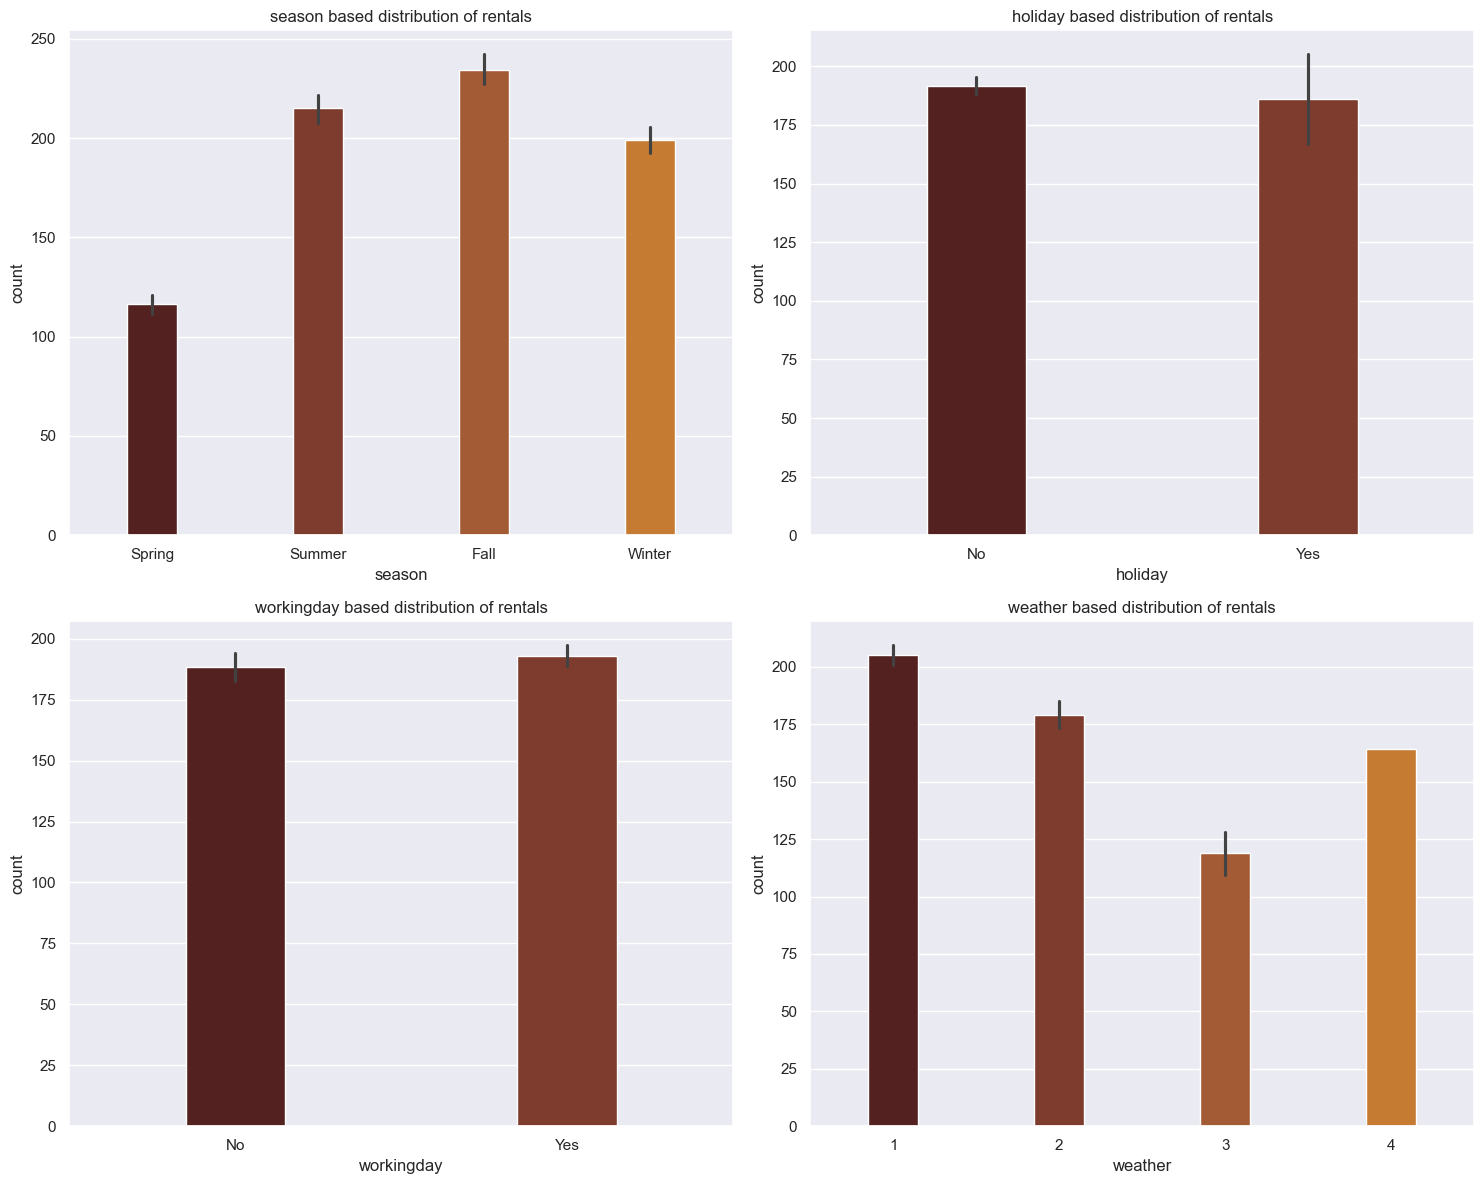

In [ ]:
plt.figure(figsize=(15, 12))
sns.set(style="darkgrid")

for i, column in enumerate(cat_col,1):
    plt.subplot(2, 2, i)
    sns.barplot(x=column, y='count', data=df, palette=color_map, width = 0.3)
    plt.title(f'{column} based distribution of rentals')
    
plt.tight_layout()
plt.show()

In [ ]:
correlation_matrix = df[["atemp", "temp", "humidity", "windspeed", "casual", "registered","count"]].corr()
correlation_df = pd.DataFrame(correlation_matrix)
correlation_df

,atemp,temp,humidity,windspeed,casual,registered,count
atemp,1.000000,0.984948,-0.043536,-0.057473,0.462067,0.314635,0.389784
temp,0.984948,1.000000,-0.064949,-0.017852,0.467097,0.318571,0.394454
humidity,-0.043536,-0.064949,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.057473,-0.017852,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.462067,0.467097,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.314635,0.318571,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.389784,0.394454,-0.317371,0.101369,0.690414,0.970948,1.000000


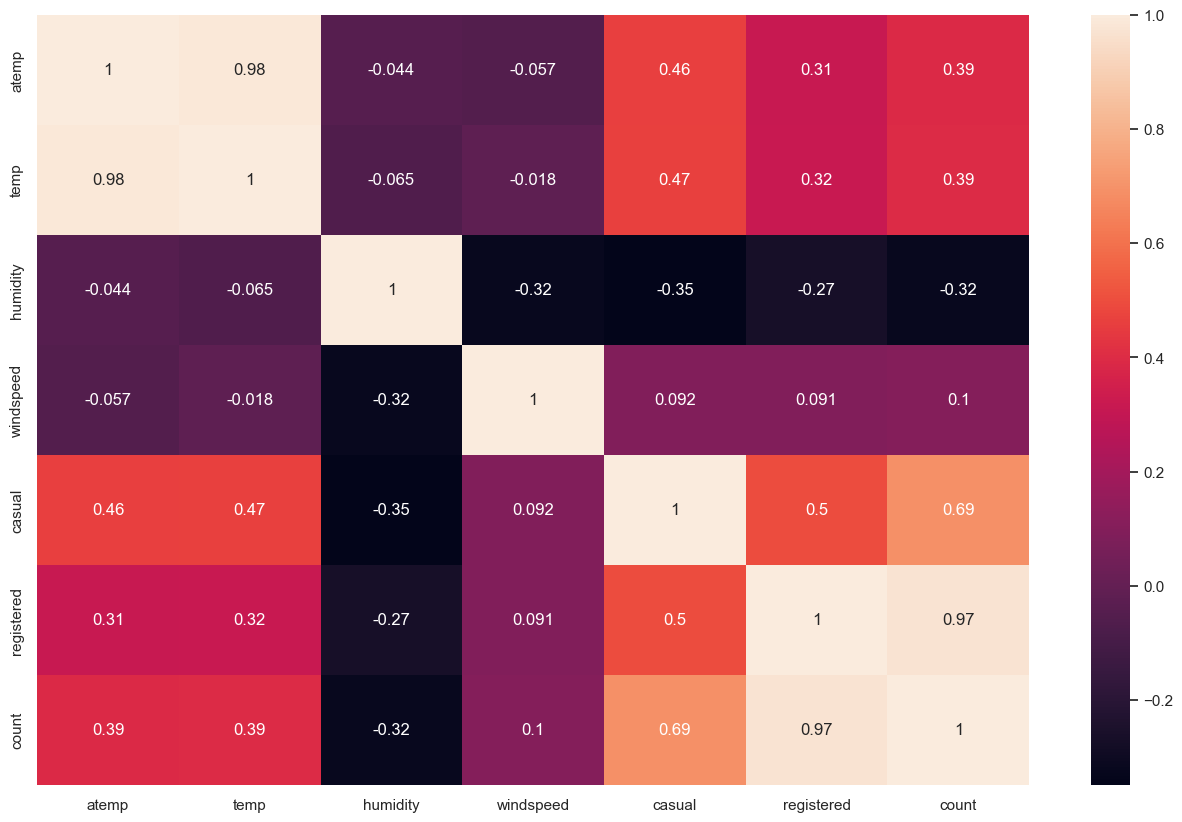

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(correlation_matrix, annot = True)
plt.show()

### Correlation Analysis

**Atemp**:
- Exhibits a strong positive correlation with 'temp' (0.98), indicating a close relationship.
- Shows a moderate positive correlation with 'casual' (0.46) and 'registered' (0.31).
- Has a positive correlation with 'count' (0.39), suggesting a relationship with overall bike rentals.

**Temp (Temperature)**:
- Strongly correlated with 'atemp' (0.98), indicating a strong connection.
- Shows a moderate positive correlation with 'casual' (0.47) and 'registered' (0.32).
- Has a positive correlation with 'count' (0.39), showing a relationship with overall bike rentals.

**Humidity**:
- Displays a weak negative correlation with 'atemp' (-0.04) and 'temp' (-0.06).
- Exhibits a moderate negative correlation with 'casual' (-0.35), 'registered' (-0.27), and 'count' (-0.32).
- Indicates a tendency for fewer bike rentals during higher humidity levels.

**Windspeed**:
- Shows a weak negative correlation with 'atemp' (-0.06) and 'temp' (-0.02).
- Displays a weak positive correlation with 'casual' (0.09), 'registered' (0.09), and 'count' (0.10).
- Suggests a subtle influence on bike rentals with increasing wind speed.

**Casual (Casual Bike Rentals)**:
- Has a strong positive correlation with 'atemp' (0.46) and 'temp' (0.47).
- Shows a moderate negative correlation with 'humidity' (-0.35) and a positive correlation with 'windspeed' (0.09).
- Highly correlated with 'registered' (0.50) and 'count' (0.69), indicating a significant impact on overall rentals.

**Registered (Registered Bike Rentals)**:
- Displays a positive correlation with 'atemp' (0.31) and 'temp' (0.32).
- Shows a negative correlation with 'humidity' (-0.27) and a positive correlation with 'windspeed' (0.09).
- Highly correlated with 'casual' (0.50) and 'count' (0.97), emphasizing a substantial impact on overall rentals.

**Count (Total Bike Rentals)**:
- Exhibits a positive correlation with 'atemp' (0.39), 'temp' (0.39), and 'casual' (0.69).
- Displays a negative correlation with 'humidity' (-0.32).
- Highly correlated with 'registered' (0.97), highlighting the joint impact of casual and registered rentals on the overall count.

In [ ]:
monthly_count = df.groupby('month')['count'].sum().reset_index()
monthly_count = monthly_count.sort_values(by='count', ascending=False)
monthly_count

,month,count
6,June,220733
5,July,214617
1,August,213516
11,September,212529
10,October,207434
8,May,200147
9,November,176440
0,April,167402
2,December,160160
7,March,133501


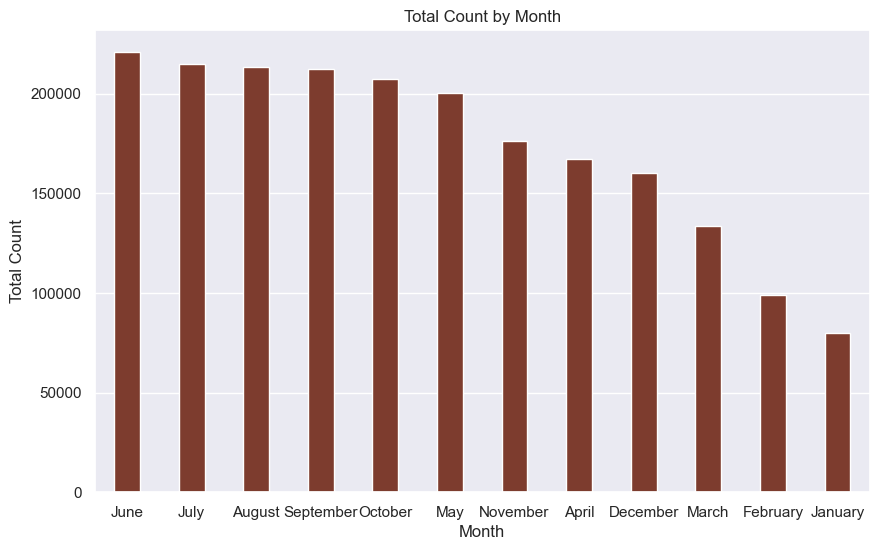

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='count', data=monthly_count, color=color_map[1], width = 0.4)

plt.title('Total Count by Month')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.show()

### Monthly Analysis of Rentals

**Peak Rental Months**:
- June is the peak month for bike rentals, with the highest count of 220,733, followed closely by July and August.

**Seasonal Trend**:
- Summer months (June, July, August) exhibit higher bike rental counts, aligning with favorable weather conditions.

**Off-Peak Rental Months**:
- January, February, and March have significantly lower bike rental counts, indicating potential off-peak periods, likely influenced by colder weather or fewer outdoor activities.

# Hypothesis Testing

### Demand Analysis of Bicycles on Rent: Weekdays vs. Weekends

To determine if the demand for bicycles on rent is the same on weekdays and weekends, we can use a Two Sample Independent T-Test, as we are comparing two independent samples.

**Assumptions of the Two Sample Independent T-Test**:
- The data should be normally distributed.
- The variances of the two groups should be equal.

We'll use a 95% confidence interval, which corresponds to a significance level (alpha) of 0.05.

To verify the normality of the data, we will employ the Wilk-Shapiro Test. The hypotheses for the Wilk-Shapiro Test are as follows:
- **Null Hypothesis (Ho)**: The data is normally distributed.
- **Alternative Hypothesis (Ha)**: The data is not normally distributed.

In [ ]:
np.random.seed(1234)

df_subset = df.sample(100)["count"]

test_stat, p_val = shapiro(df_subset)

p_val

5.799626108151946e-07

Since the p_values is lesser than the significance level, Null hypothesis can be rejected.

**Therefore the data is not normally distributed**

### QQ Plot Analysis

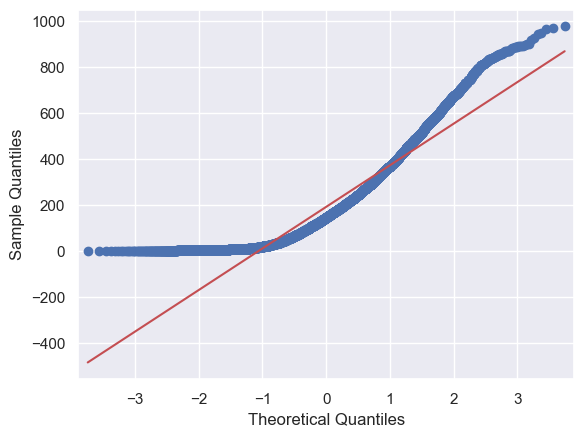

In [ ]:
qqplot(df['count'], line = 's')
plt.show()

To determine if the variances of two groups are equal, we will perform Levene's test. The hypotheses for Levene's test are as follows:

- **H₀ (Null Hypothesis)**: The variances are equal.
- **Hₐ (Alternative Hypothesis)**: The variances are not equal.

In [ ]:
working_day = df[df['workingday'] == 'Yes']['count']

holiday = df[df['workingday'] == 'No']['count']

levene_stat, p_val = levene(working_day, holiday)

p_val

0.9437823280916695

<Axes: xlabel='count', ylabel='Density'>

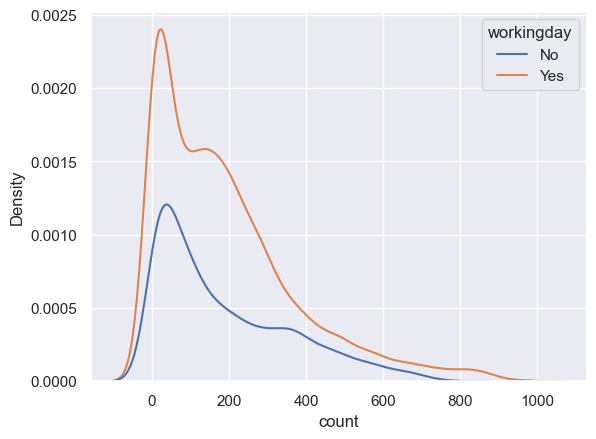

In [ ]:
sns.kdeplot(data = df, x = 'count', hue = 'workingday')

### Statistical Analysis Summary

Since the p-values are greater than the significance level, we accept the null hypothesis.

**Therefore, the variances are approximately equal.**

Despite the data not being normally distributed according to both the Shapiro-Wilk test and the Q-Q plot, it is important to emphasize that the variances between the two groups are equal. 

**This allows us to proceed with the Two-Sample Independent T-Test.**

The hypotheses for the t-test are:

- **Null Hypothesis (Ho)**: There is no significant difference between working and non-working days.
- **Alternative Hypothesis (Ha)**: There is a significant difference between working and non-working days.

In [ ]:
ttest_stat,pval = ttest_ind(working_day,holiday)
pval

0.22644804226361348

Since the p_value is greater than the significance level, Null hypothesis can be accepted.

**Therefore, there is no significant difference on bike rentals between working and non-working days.**

In [ ]:
kruskal_stat, p_val = kruskal(working_day, holiday)

p_val

0.9679113872727798

Since the p_value is greater than the significance level, Null hypothesis can be accepted.

**Therefore, there is no significant difference on bike rentals between working and non-working days.**

### Demand of bicycles on rent is the same for different Weather conditions

Since we have more than two categories, we will use ANOVA.

#### Assumptions for ANOVA:
1. **Normality**: The population data should be normally distributed. However, the data is not normal as verified by the Wilk-Shapiro test and the QQ plot.
2. **Independence**: The data points must be independent. This condition is satisfied.
3. **Homogeneity of Variances**: There should be approximately equal variance within groups. This will be verified using Levene's test.

In [ ]:
df.groupby('weather')['count'].skew()

weather
1    1.139857
2    1.294444
3    2.187137
4         NaN
Name: count, dtype: float64

In [ ]:
df.groupby('weather')['count'].apply(lambda x: x.kurtosis())

weather
1    0.964720
2    1.588430
3    6.003054
4         NaN
Name: count, dtype: float64

<Axes: xlabel='count', ylabel='Density'>

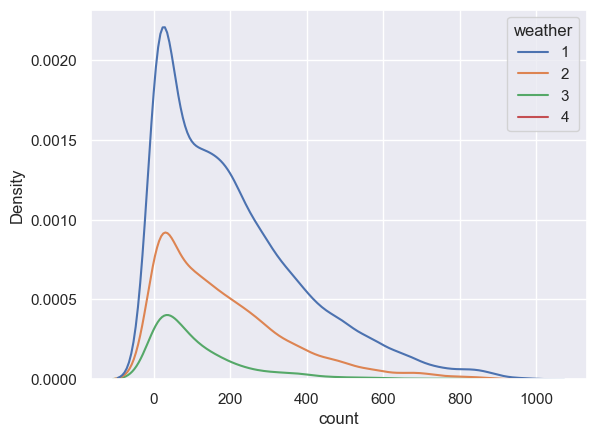

In [ ]:
sns.kdeplot(data = df, x = 'count', hue = 'weather')

The Test hypothesis for Levene's test are:

- **Null Hypothesis (Ho):** There is no difference in variances.
- **Alternative Hypothesis (Ha):** There is a difference in variances.

In [ ]:
weather1 = df[df['weather'] == 1]['count']
weather2 = df[df['weather'] == 2]['count']
weather3 = df[df['weather'] == 3]['count']
weather4 = df[df['weather'] == 4]['count']

levene_stat, p_val = levene(weather1, weather2, weather3,weather4)

p_val

3.504937946833238e-35

Since the p_value is smaller than the significance level, Null hypothesis can be rejected.

**Therefore, the variances are unequal**

Even though two of the three conditions for ANOVA are not satisfied, we will proceed with ANOVA.

Additionally, we will perform Kruskal's test and compare the results.

If there are any discrepancies, we will prioritize the results from Kruskal's test, as the data does not meet the conditions for ANOVA.

**Regarding the hypotheses for ANOVA:**

- Null Hypothesis (Ho): There is no significant difference in demand for bicycles across different weather conditions.
- Alternative Hypothesis (Ha): There is a significant difference in demand for bicycles across different weather conditions.

In [ ]:
anova_stat, p_val = f_oneway(weather1, weather2, weather3,weather4)

p_val

5.482069475935669e-42

Since the p_value is smaller than the significance level, Null hypothesis can be rejected.

**Therefore, there is a significant difference between demand of bicycles for different Weather conditions.**

### Kruskal Test on weather

In [ ]:
kruskal_stat, p_val = kruskal(weather1, weather2, weather3,weather4)

p_val

3.501611300708679e-44

Again the p_value is smaller than the significance level, Null hypothesis can be rejected.

**Therefore, we can conclude that there is a significant difference between demand of bicycles for different Weather conditions.**

### Demand of bicycles on rent is the same for different Seasons

Since there are more than two categories, ANOVA will be used for analysis.

Assumptions for ANOVA:

- **Normal distribution of population data:** The data does not follow a normal distribution, as confirmed by the Shapiro-Wilk test and Q-Q plot.

- **Independence of data points:** This assumption is satisfied.

- **Approximately equal variance within groups:** This will be assessed using Levene's test.

In [ ]:
df.groupby('season')['count'].skew()

season
Spring    1.888056
Summer    1.003264
Fall      0.991495
Winter    1.172117
Name: count, dtype: float64

In [ ]:
df.groupby('season')['count'].apply(lambda x: x.kurtosis())

season
Spring    4.314757
Summer    0.425213
Fall      0.699383
Winter    1.273485
Name: count, dtype: float64

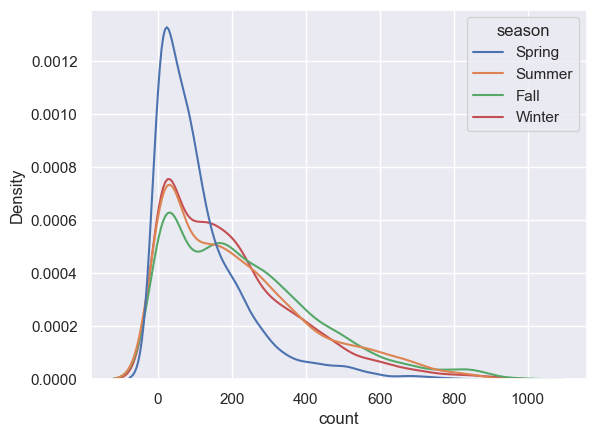

In [ ]:
sns.kdeplot(data = df, x = 'count', hue = 'season')
plt.show()

The Test hypothesis for Levene's test are:

- **Null Hypothesis (Ho):** The variances are equal.
- **Alternate Hypothesis (Ha):** The variances are not equal.

In [ ]:
spring = df[df['season'] == 'Spring']['count']
summer = df[df['season'] == 'Summer']['count']
fall = df[df['season'] == 'Fall']['count']
winter = df[df['season'] == 'Winter']['count']

levene_stat, p_val = levene(spring,summer,fall,winter)

p_val

1.0147116860043298e-118

Since the p-value is smaller than the significance level, we reject the null hypothesis.

**Therefore, the variances are unequal**

As before, we will utilize both ANOVA and Kruskal's test, and compare their results.
If inconsistencies emerge, we will prioritize Kruskal's test, given that the data does not meet the conditions for ANOVA.

Regarding the hypotheses for ANOVA:

- **Null Hypothesis (Ho):** There is no significant difference in demand for bicycles across different seasons.
- **Alternative Hypothesis (Ha):** There is a significant difference in demand for bicycles across different seasons.

In [ ]:
anova_stat, p_val = f_oneway(spring ,summer, fall, winter)

p_val

6.164843386499654e-149

Hence the p-value is smaller than the significance level, Null hypothesis can be rejected.

**Therefore, there is a significant difference between demand of bicycles for different Seasons.**

In [ ]:
kruskal_stat,p_val = kruskal(spring ,summer, fall, winter)
p_val

2.479008372608633e-151

Again the p-value is smaller than the significance level, Null hypothesis can be rejected.

**Therefore, we can conclude that there is a significant difference between demand of bicycles for different Seasons.**

### Analysis of Weather conditions across Seasons using Chi-squared Test

The hypothesis for the chi-square test are:

- **Null Hypothesis (Ho):** Season and Weather are independent of each other.
- **Alternative Hypothesis (Ha):** Season and Weather are dependent on each other

In [ ]:
contingency_table = pd.crosstab(df['weather'], df['season'])

contingency_table

season,Spring,Summer,Fall,Winter
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=49.15865559689363, pvalue=1.5499250736864862e-07, dof=9, expected_freq=array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

Hence the pvalue(1.5499250736864862e-07) is smaller than the significance level, Null hypothesis can be rejected.

**Therefore, we can conclude that Season and Weather are dependent on each other.**

### Strategic Recommendations for Yulu's Profitable Growth

1. Focus bike deployment efforts during peak months, particularly in June, July, and August, to meet heightened demand and capitalize on favorable weather conditions.
   
2. Customize marketing strategies to align with seasonal trends, intensifying promotion of Yulu's services during summer months to attract a larger user base.
   
3. Implement targeted promotional campaigns or discounts in off-peak months (e.g., January to March) to stimulate higher bike rentals and maintain consistent revenue.
   
4. Consider dynamic pricing strategies that adjust rental rates in response to weather conditions, optimizing revenue generation on days with extreme weather.
   
5. Explore additional revenue streams such as partnerships, sponsorships, or premium memberships to diversify income sources and enhance overall profitability.
   
6. Invest in technology and infrastructure improvements to elevate user experience, including app enhancements, bike maintenance, and customer support, fostering loyalty and repeat business.
   
7. Adjust bike deployment strategies to optimize resource allocation throughout the week, considering the consistent demand for bikes across working and non-working days.
   
8. Tailor promotions and discounts based on weather conditions; for instance, offering special deals during rainy days to encourage increased bike usage.
   
9. Promote Yulu bikes uniquely in each season, highlighting seasonal promotions like those in June, July, and August when bike usage is higher.
   
10. Plan bike availability based on both seasonal and weather forecasts to ensure adequate bike supply during peak demand periods, such as sunny days in summer.